# Imports

In [165]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlite3 as db


# Connect to Database

In [3]:
conn = db.connect('data_gathering\hs_bowl_sw_district_oh.db')

In [4]:
cur = conn.cursor()

# Plotting

In [190]:
sns.set(font_scale=1.5)

## Average Individual Pinfall vs. Median Income

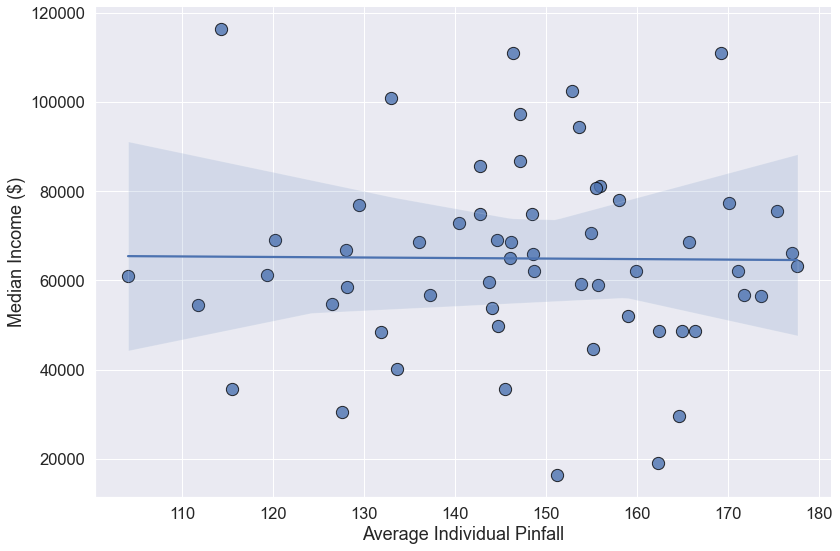

In [191]:
df_inc_avg = pd.read_sql('SELECT  i.median_income AS "Median Income ($)", \
            AVG(g.avg) AS "Average Individual Pinfall"\
            FROM games g \
            LEFT JOIN schools s \
            ON s.name = g.school\
            LEFT JOIN median_income i \
            ON i.zip_code = s.zip\
            GROUP BY school \
            ORDER BY AVG(g.avg) DESC', conn)
sns.lmplot(x='Average Individual Pinfall',
    y='Median Income ($)',
    data=df_inc_avg,
    fit_reg=True,
    ci=100,
    height=8,
    aspect=1.5,
    scatter_kws={'s': 150, 'edgecolors':'black'})
plt.show()

The average of each schools' individual bowlers' scores do not show a strong correlation with the median income for the ZIP Code™ where the school is located.

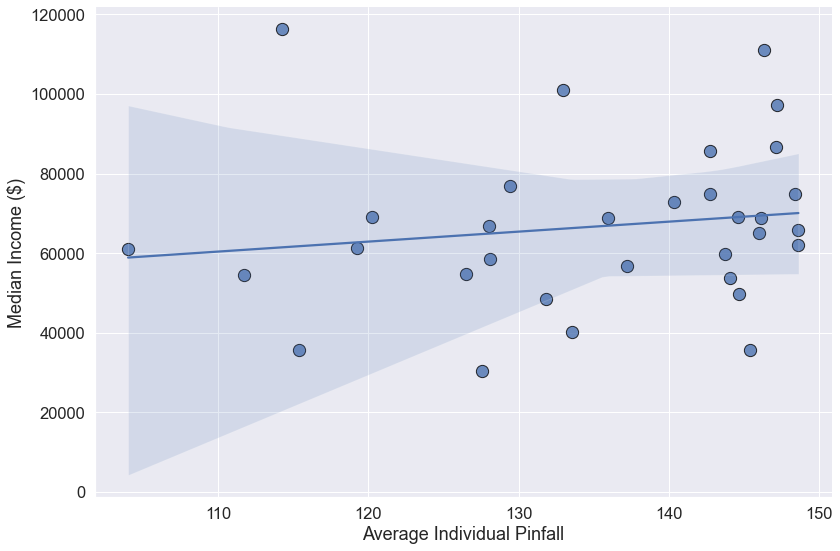

In [192]:
df_inc_avg_low = pd.read_sql('SELECT  i.median_income AS "Median Income ($)", \
            AVG(g.avg) AS "Average Individual Pinfall"\
            FROM games g \
            LEFT JOIN schools s \
            ON s.name = g.school\
            LEFT JOIN median_income i \
            ON i.zip_code = s.zip\
            GROUP BY school \
            HAVING AVG(g.avg) <150\
            ORDER BY AVG(g.avg) DESC', conn)
sns.lmplot(x='Average Individual Pinfall',
    y='Median Income ($)',
    data=df_inc_avg_low,
    fit_reg=True,
    ci=100,
    height=8,
    aspect=1.5,
    scatter_kws={'s': 150, 'edgecolors':'black'})
plt.show()

There is some correlation between these variables on the lower end of the scores, however.

## Average Individual Pinfall vs. Nearby Bowling Alleys

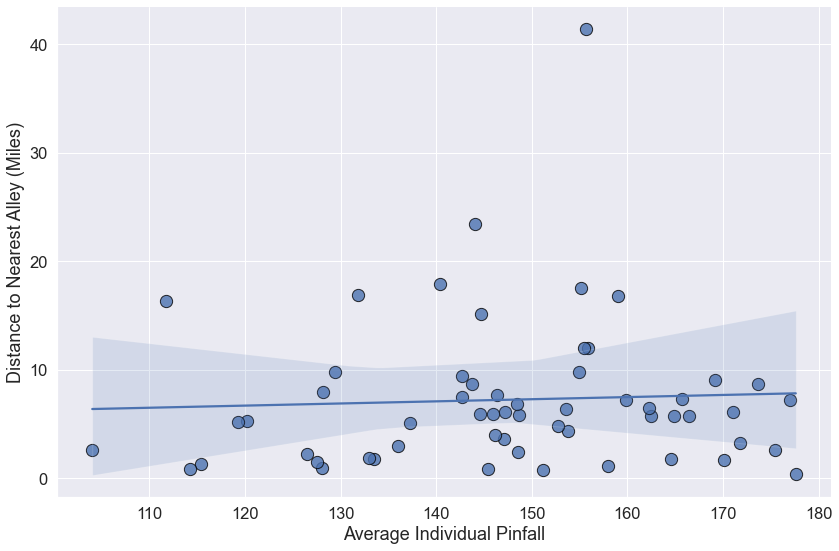

In [203]:
df_dist_avg_min = pd.read_sql('SELECT s.name AS "School Name", \
            s.min_dist AS "Distance to Nearest Alley (Miles)", \
            AVG(g.avg) AS "Average Individual Pinfall"\
            FROM games g \
            LEFT JOIN schools s \
            ON s.name = g.school\
            GROUP BY g.school \
            ORDER BY AVG(g.avg) DESC', conn)
sns.lmplot(x='Average Individual Pinfall',
    y='Distance to Nearest Alley (Miles)',
    data=df_dist_avg_min,
    fit_reg=True,
    ci=100,
    height=8,
    aspect=1.5,
    scatter_kws={'s': 150, 'edgecolors':'black'})
plt.show()

There is a slight correlation between increasing distance to the nearest alley and increased score.

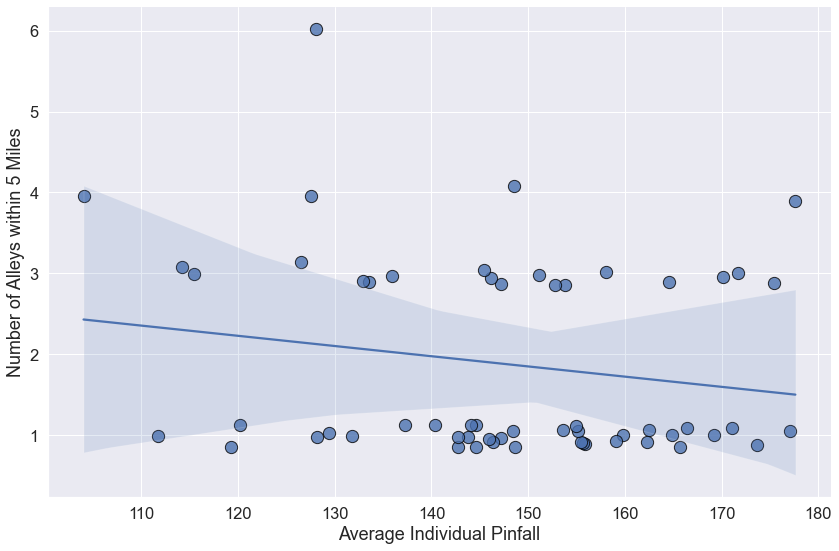

In [214]:
df_dist_avg_5 = pd.read_sql('SELECT s.name AS "School Name", \
            s.under_5 AS "Number of Alleys within 5 Miles", \
            AVG(g.avg) AS "Average Individual Pinfall"\
            FROM games g \
            LEFT JOIN schools s \
            ON s.name = g.school\
            GROUP BY g.school \
            ORDER BY AVG(g.avg) DESC', conn)
sns.lmplot(x='Average Individual Pinfall',
    y='Number of Alleys within 5 Miles',
    data=df_dist_avg_5,
    fit_reg=True,
    ci=100,
    height=8,
    aspect=1.5,
    y_jitter=.15,
    scatter_kws={'s': 150, 'edgecolors':'black'})
plt.show()

But there is a negative correlation between the average score and the number of alleys within 5 miles of the school.

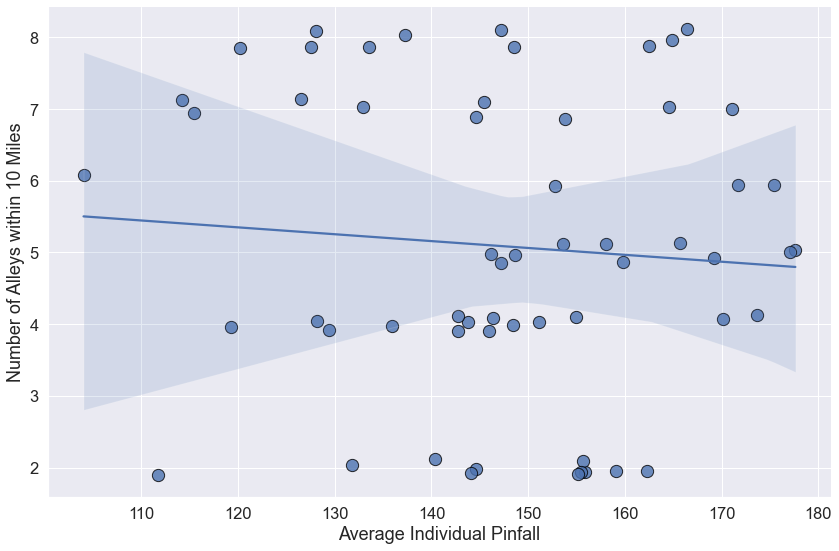

In [216]:
df_dist_avg_10 = pd.read_sql('SELECT s.name AS "School Name", \
            s.under_10 AS "Number of Alleys within 10 Miles", \
            AVG(g.avg) AS "Average Individual Pinfall"\
            FROM games g \
            LEFT JOIN schools s \
            ON s.name = g.school\
            GROUP BY g.school \
            ORDER BY AVG(g.avg) DESC', conn)
sns.lmplot(x='Average Individual Pinfall',
    y='Number of Alleys within 10 Miles',
    data=df_dist_avg_10,
    fit_reg=True,
    ci=100,
    height=8,
    aspect=1.5,
    y_jitter=.15,
    scatter_kws={'s': 150, 'edgecolors':'black'})
plt.show()

And likewise with a radius of 10 miles.
Note: jitter has been added to the y-axis for both of these plots to reduce ovelap between markers. The number of alleys within the radius is discrete.